In [58]:
#Pkg.add("DataFrames")
#Pkg.add("PyPlot")
#Pkg.add("GLM")
using DataFrames;
using GLM;
using PyPlot;

INFO: Package PyPlot is already installed
INFO: METADATA is out-of-date — you may not have the latest version of PyPlot
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [59]:
juice = readtable("grapeJuice.csv")
size(juice)
names(juice)

5-element Array{Symbol,1}:
 :sales        
 :price        
 :ad_type      
 :price_apple  
 :price_cookies

In [60]:
head(juice)

,sales,price,ad_type,price_apple,price_cookies
1,222,9.83,0,7.36,8.8
2,201,9.72,1,7.43,9.62
3,247,10.15,1,7.66,8.9
4,169,10.04,0,7.57,10.26
5,317,8.38,1,7.33,9.54
6,227,9.74,0,7.51,9.49


In [61]:
lm = fit(LinearModel, @formula(sales ~ price + ad_type + price_apple + price_cookies), juice)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at .\deprecated.jl:70
 [2] ccdf(::

DataFrames.DataFrameRegressionModel{GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: sales ~ 1 + price + ad_type + price_apple + price_cookies

Coefficients:
               Estimate Std.Error  t value Pr(>|t|)
(Intercept)     774.813   145.349   5.3307    <1e-4
price          -51.2393   5.32094 -9.62976    <1e-9
ad_type         29.7417   7.24851  4.10314   0.0004
price_apple     22.0892   12.5123   1.7654   0.0897
price_cookies  -25.2766   6.29589 -4.01478   0.0005


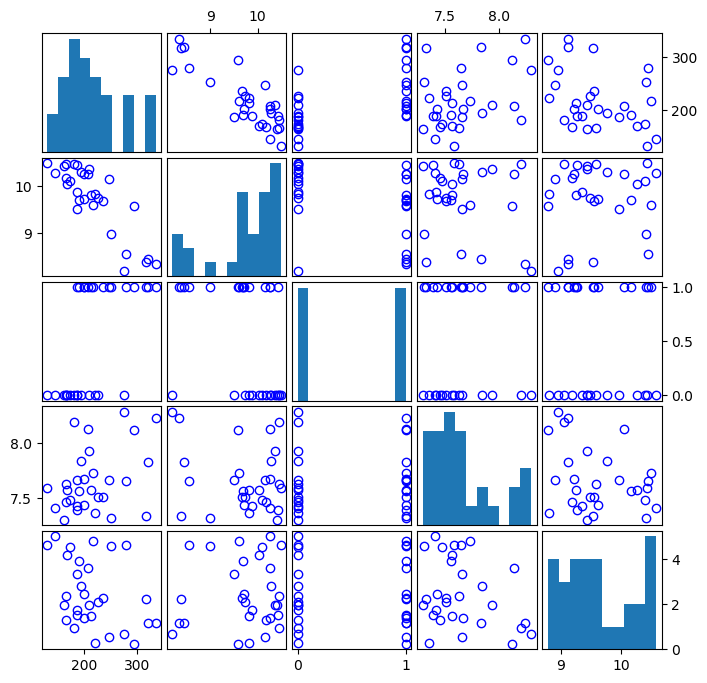

In [63]:
#function provided from https://gist.github.com/ahwillia/43c2cfb894f2bfec6760

function pairs(data)
  (nobs, nvars) = size(data)
  (fig, ax) = subplots(nvars, nvars, figsize=(8,8))
  subplots_adjust(hspace=0.05, wspace=0.05)

  # Plot data
  for i = 1:nvars
      for j = 1:nvars
          if i != j
              ax[i,j][:plot](data[:,j],data[:,i],"ob",mfc="none")
          else
              ax[i,j][:hist](data[:,i])
          end
          ax[i,j][:xaxis][:set_visible](false)
          ax[i,j][:yaxis][:set_visible](false)
      end
  end

  # Set tick positions
  for i = 1:nvars
      ax[i,1][:yaxis][:set_ticks_position]("left")
      ax[i,end][:yaxis][:set_ticks_position]("right")
      ax[1,i][:xaxis][:set_ticks_position]("top")
      ax[end,i][:xaxis][:set_ticks_position]("bottom")
  end

  # Turn ticks on
  cc = repmat([nvars, 1],Integer(ceil(nvars/2)),1)
  for i = 1:nvars
      ax[i,cc[i]][:yaxis][:set_visible](true)
      ax[cc[i],i][:xaxis][:set_visible](true)
  end
end

pairs(juice)